In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/glass.csv')

In [3]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


<Axes: xlabel='Type', ylabel='count'>

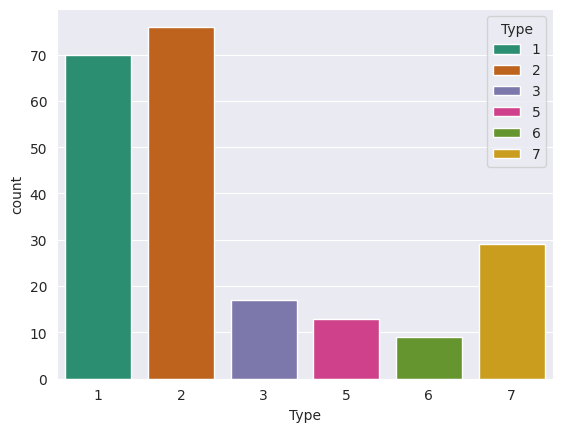

In [4]:
sns.countplot(x='Type', data=df, palette='Dark2', hue='Type')

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [6]:
base_classifiers = [
    ('svc', SVC(random_state=42, kernel='rbf', gamma=0.1, C=100)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=7)),
    ('gnb', GaussianNB()),
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(df.drop('Type', axis=1), df['Type'], random_state=42, test_size=0.25)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
accuracy_scores = {'svc': [], 'dt': [], 'knn': [], 'gnb': [], 'lr': []}
for estimator in base_classifiers:
    for n_estimators in range(10, 110, 5):
        model = BaggingClassifier(estimator=estimator[1], random_state=42, n_estimators=n_estimators)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_scores[estimator[0]].append(accuracy_score(y_test, y_pred))

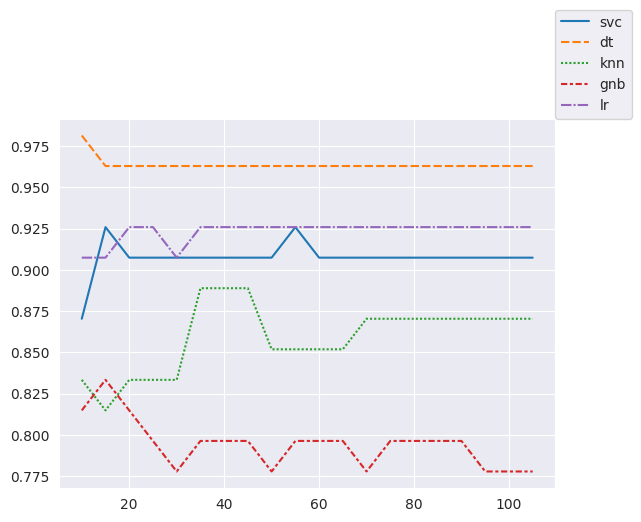

In [10]:
sns.lineplot(pd.DataFrame(accuracy_scores, index=range(10, 110, 5)))
plt.legend(loc=(1, 1))